## Regex for date and time

In [2]:
from datasets import load_dataset

ds = load_dataset("clarin-knext/fiqa-pl", "corpus")

In [1]:
import regex
import re

In [4]:
ds['corpus']['text'][:4]

['Nie mówię, że nie podoba mi się też pomysł szkolenia w miejscu pracy, ale nie możesz oczekiwać, że firma to zrobi. Szkolenie pracowników to nie ich praca – oni tworzą oprogramowanie. Być może systemy edukacyjne w Stanach Zjednoczonych (lub ich studenci) powinny trochę martwić się o zdobycie umiejętności rynkowych w zamian za ich ogromne inwestycje w edukację, zamiast wychodzić z tysiącami zadłużonych studentów i narzekać, że nie są do niczego wykwalifikowani.',
 'Tak więc nic nie zapobiega fałszywym ocenom poza dodatkową kontrolą ze strony rynku/inwestorów, ale istnieją pewne nowsze kontrole, które uniemożliwiają instytucjom korzystanie z nich. W ramach DFA banki nie mogą już polegać wyłącznie na ratingach kredytowych jako należytej staranności przy zakupie instrumentu finansowego, więc to jest plus. Intencją jest to, że jeśli instytucje finansowe wykonują swoją własną pracę, to *być może* dojdą do wniosku, że określony CDO jest śmieciem, czy nie. Edycja: wprowadzenie',
 'Nigdy nie m

In [5]:
len(ds['corpus']['text'])

57638

In [149]:
time_regex = r'(\b(\d{1,2}):\d{2}\b)' # what with 50:50?
time_regex = r'(\b([012]?\d):\d{1,2}\b)' # counterexample 26:0
time_regex = r'(\b([01]?\d|[2][0-4]):([0-5]\d|\d)\b)' 
# can be 1:1 considered as proper hour? lets assume no
time_regex = r'(\b([01]?\d|[2][0-4]):[0-5]\d\b)'
# is 24 proper hour? lets assume so

date_regex = r'(\d{1,2}\s(stycz|lut|mar|kwie|maj|czerw|lip|sierp|wrze|październik|listopad|grud))' 
# what with 99 stycz or 30 lut?

for i, text in enumerate(ds['corpus']['text'][:1000]):
    if (time_match := regex.findall(time_regex, text)) or (date_match := re.findall(date_regex, text)):
        #print(f"{i}  {time_match}  {date_match}")
        print(f"{i}  {[tm[0] for tm in time_match]}  {[dm[0] for dm in date_match]}")


6  []  ['1 czerw', '1 sierp', '1 sierp']
49  ['17:57', '17:57']  []
75  []  ['2 kwie', '30 kwie']
105  []  ['1 grud', '1 grud']
137  ['6:17']  []
165  ['20:00', '17:00']  []
178  []  ['4 maj', '2 mar', '18 lip', '23 czerw', '17 październik', '15 lut', '18 grud', '6 wrze', '16 wrze', '28 lut', '29 wrze', '4 grud', '7 mar', '11 grud', '5 październik', '18 mar', '9 stycz', '8 lip', '7 mar', '22 lip', '25 październik', '22 lip', '2 listopad', '20 październik', '16 kwie', '29 grud', '29 grud', '8 listopad', '27 maj', '29 listopad', '8 czerw', '12 wrze', '25 stycz', '8 maj', '19 stycz', '30 październik', '5 lut', '18 stycz', '25 kwie', '30 maj', '18 wrze', '11 sierp', '23 stycz', '9 maj', '17 wrze', '10 październik', '15 grud', '25 mar', '15 grud', '11 listopad', '85 grud', '1 czerw', '15 grud', '2 listopad', '27 listopad', '21 mar', '27 lip', '27 mar', '5 kwie', '22 lut', '31 sierp', '30 sierp', '26 wrze', '30 sierp', '29 stycz', '29 listopad', '21 mar', '24 kwie']
191  ['22:00']  []
229  [

In [150]:
time_dict = {i:0 for i in range(24)}
date_dict = {month:0 for month in "stycz|lut|mar|kwie|maj|czerw|lip|sierp|wrze|październik|listopad|grud".split('|')}

for i, text in enumerate(ds['corpus']['text']):
    if time_match := regex.findall(time_regex, text):
        for tm in time_match:
            time_dict[int(tm[1])] = time_dict.get(int(tm[1]), 0) + 1
    if date_match := re.findall(date_regex, text):
        for dm in date_match:
            date_dict[dm[1]] = date_dict.get(dm[1], 0) + 1
    
print(time_dict)
print(date_dict)

{0: 41, 1: 28, 2: 16, 3: 13, 4: 22, 5: 14, 6: 15, 7: 7, 8: 16, 9: 27, 10: 8, 11: 16, 12: 14, 13: 17, 14: 16, 15: 26, 16: 26, 17: 34, 18: 16, 19: 19, 20: 18, 21: 7, 22: 19, 23: 14, 24: 1}
{'stycz': 215, 'lut': 82, 'mar': 119, 'kwie': 201, 'maj': 96, 'czerw': 104, 'lip': 104, 'sierp': 111, 'wrze': 122, 'październik': 101, 'listopad': 56, 'grud': 182}


In [151]:
import json

print(json.dumps(time_dict, indent=4))

{
    "0": 41,
    "1": 28,
    "2": 16,
    "3": 13,
    "4": 22,
    "5": 14,
    "6": 15,
    "7": 7,
    "8": 16,
    "9": 27,
    "10": 8,
    "11": 16,
    "12": 14,
    "13": 17,
    "14": 16,
    "15": 26,
    "16": 26,
    "17": 34,
    "18": 16,
    "19": 19,
    "20": 18,
    "21": 7,
    "22": 19,
    "23": 14,
    "24": 1
}


In [152]:
print(json.dumps(date_dict, indent=4, ensure_ascii=False))

{
    "stycz": 215,
    "lut": 82,
    "mar": 119,
    "kwie": 201,
    "maj": 96,
    "czerw": 104,
    "lip": 104,
    "sierp": 111,
    "wrze": 122,
    "październik": 101,
    "listopad": 56,
    "grud": 182
}


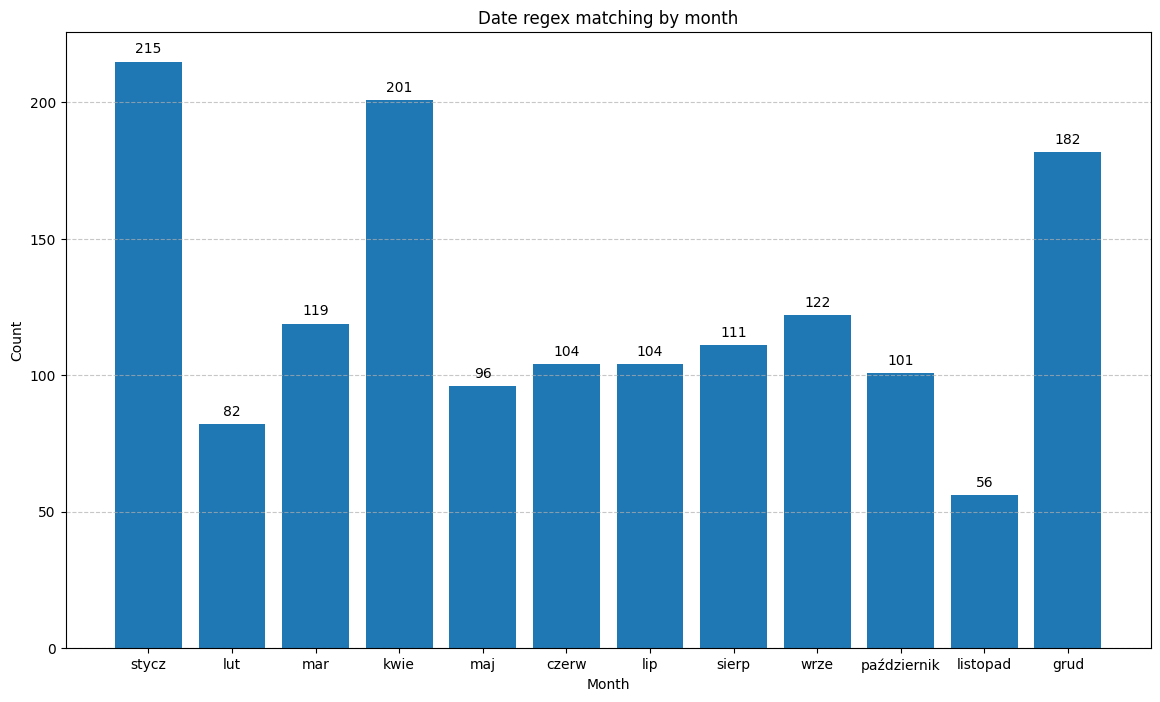

In [153]:
import matplotlib.pyplot as plt

data = date_dict

items = list(data.keys())
counts = list(data.values())

plt.figure(figsize=(14, 8))
plt.bar(items, counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(counts):
    plt.text(i, count + 3, str(count), ha='center')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Date regex matching by month')

plt.show()

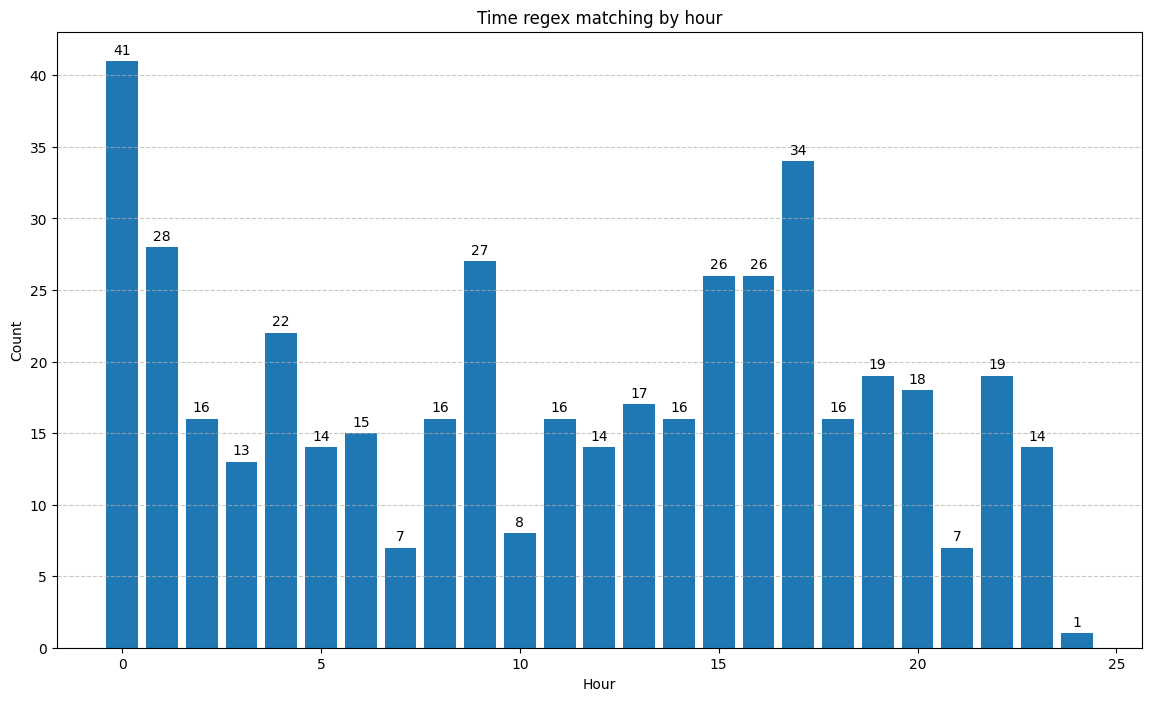

In [154]:
data = time_dict

items = list(data.keys())
counts = list(data.values())

plt.figure(figsize=(14, 8))
plt.bar(items, counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Time regex matching by hour')

plt.show()

## Kwiecień matching

In [157]:
april_regex = r'kwie(cień|tni(a|e|u|o|ó|\b))'
april_regex_with_num = r'(?<=\d\s)(kwie(cień|tni(a|e|u|o|ó|\b)))'
april_regex_wo_num = r'(?<!\d\s)(kwie(cień|tni(a|e|u|o|ó|\b)))'

april_matches = 0
april_with_num = 0
april_wo_num = 0

for i, text in enumerate(ds['corpus']['text']):
    april_matches += len(regex.findall(april_regex, text))
    april_with_num += len(regex.findall(april_regex_with_num, text))
    april_wo_num += len(regex.findall(april_regex_wo_num, text))
    

In [166]:
print(f'{april_matches = }\n{april_with_num = }\n{april_wo_num = }')
assert(april_with_num + april_wo_num == april_matches)
print(f'\n{april_with_num} + {april_wo_num} = {april_matches}')

april_matches = 359
april_with_num = 201
april_wo_num = 158

201 + 158 = 359


## Play with LLM

### [Google Gemini](https://gemini.google.com/app)

prompt:
```
Devise two regular expressions:
- extracting times, e.g. recognizing 20:30 as an instance of a time.
- extracting dates, e.g. recognizing 20 września as an instance of a date.
```

In [167]:
time_regex_by_gemini = r'(0[0-9]|1[0-9]|2[0-3]):[0-5][0-9]'
# ok but can be simplified, \d vs [0-9]
date_regex_by_gemini = r'([1-9]|1[0-9]|2[0-9]|3[0-1])\s(stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia)'
# what with different forms of month names? 
# day date more precise but still it will match '31 lutego' etc.

prompt:
```
Create 3 regex:
1. should match each occurrences of kwiecień word in any inflectional form
2. as in 1, but preceded by a number and a space.
3. as in 1 but not preceded by a number and a space.
```

In [170]:
april_regex_by_gemini = r'kwiecień|kwietnia|kwietniom|kwietniu|kwietnie|kwietni'
april_regex_with_num_by_gemini = r'\d\skwiecień|\d\skwietnia|\d\skwietniom|\d\skwietniu|\d\skwietnie|\d\skwietni'
april_regex_wo_num_by_gemini = r'^(?!\d\s)(kwiecień|kwietnia|kwietniom|kwietniu|kwietnie|kwietni)'
# exactly as is forbidden

prompt:
```
Same task as earlier but use a compact form for the query. 
You are not allowed to join all forms of the word by alternative.
```

In [172]:
april_regex_by_gemini = r'kwiecień(ia|om|u|e|ni)'
april_regex_with_num_by_gemini = r'kwiecień(ia|om|u|e|ni)'
april_regex_wo_num_by_gemini = r'^(?!\d\s)kwiecień(ia|om|u|e|ni)'
# polish grammar is definitely not what Gemini is good at

### [Chat GPT by OpenAI (version 4o)](https://chatgpt.com/)

prompt:
```
Create 3 regex:
1. should match each occurrences of kwiecień word in any inflectional form
2. as in 1, but preceded by a number and a space.
3. as in 1 but not preceded by a number and a space.
```

In [3]:
april_regex_by_gpt4o = r'\bkwiec(i[eęńń]ń|tni(a|owi|em|u))\b'  
# 'kwiecińń', 'kwiectnia' - YES, but 'kwietnia' - NO
april_regex_with_num_by_gpt4o = r'\b\d+\s+kwiec(i[eęńń]ń|tni(a|owi|em|u))\b'
april_regex_wo_num_by_gpt4o = r'(?<!\b\d+\s)kwiec(i[eęńń]ń|tni(a|owi|em|u))\b'
# ChatGPT did his job a little better than Gemini, but just a very little. 

In [6]:
april_matches = 0
april_with_num = 0
april_wo_num = 0

for i, text in enumerate(ds['corpus']['text']):
    april_matches += len(regex.findall(april_regex_by_gpt4o, text))
    april_with_num += len(regex.findall(april_regex_with_num_by_gpt4o, text))
    april_wo_num += len(regex.findall(april_regex_wo_num_by_gpt4o, text))
    
print(f'{april_matches = }\n{april_with_num = }\n{april_wo_num = }')
assert(april_with_num + april_wo_num == april_matches)
print(f'\n{april_with_num} + {april_wo_num} = {april_matches}')
    

april_matches = 14
april_with_num = 0
april_wo_num = 14

0 + 14 = 14


## Wnioski
- regex nie są zbyt dobry w dopasowywaniu dat - tylko uwzględnianie miesięcy wpisanych w słownie wymaga skonstruowania dość długiego wyrażenia regularnego, a chcąc dodać do tego zapis miesięcy cyframi (arabskimi lub rzymskimi) dochodzą dodatkowe komplikacje. Do tego daty w zależności od kraju są zapisywane inaczej (kolejność miesiąca i dnia w dacie). Dopuszczone są też zróżnicowane separatory.
- znacznie lepiej regex sprawdzają się w dopasowywaniu godzin. Godziny posiadają ustandaryzowany format, do którego regex może się stosunkowo łatwo dopasować.
- Dobrze napisany regex powinien bezbłędnie dopasowywać się do wszystkich wyrażeń i można mieć pewność, że będzie działał dobrze, W przypadku bardziej skomplikowanych wyrażeń łatwo jednak o przeoczenia. Nietrudno dopuścić do sytuacji, w której nie uwzględnimy jakiegoś przypadku i regex nie będzie znajdował wszystkich dopasowań, lub wręcz przeciwnie, będzie dopasowywał się do rzeczy, które nie są pożądane - aby zminimalizować ryzyko niepożądanych dopasowań trzeba tworzyć jak najbardziej szczegółowe wyrażenia regularne, np. dodając znaki granicy słowa itd.
- Gemini nie radzi sobie zbyt dobrze z odmianą czasowników po polsku i nie jest w stanie stworzyć odpowiedniego regexu. Chat GPT w wersji 4o poradził sobie odrobinę lepiej, ale wyniki wciąż pozostają dalekie od oczekiwań. Żaden z nich nie uwzględnia w swoich odpowiedziach odmiany 'kwietnia' w liczbie mnogiej (chociaż w przypadku nazwy miesiąca zastosowanie takiej formy jest raczej marginalne)